In [46]:
pip install koreanize_matplotlib

Note: you may need to restart the kernel to use updated packages.


In [47]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [3]:
# 결측치 확인하는 라이브러리
import missingno as msno

# seaborn의 다른 라이브러리
import seaborn.objects as so

# Warning 메세지를 뜨지 않게 해줌
import warnings
warnings.filterwarnings('ignore')

변수이름을 내가 다루기 쉬운 한글로 변경하고 전처리를 진행한다.

In [147]:
bike = pd.read_csv("C:/Users/정가경/Downloads/train (2).csv",encoding = 'EUC-KR')
df = bike.copy()
df.columns=['날짜','자전거 대여량','시간','온도','습도','풍속','가시성','이슬점','태양복사','강수량','강설량','계절','공휴일','사용가능일']

# 전체 데이터 확인하기

In [148]:
df.describe()

,자전거 대여량,시간,온도,습도,풍속,가시성,이슬점,태양복사,강수량,강설량
count,7008.000000,7008.000000,6306.000000,7008.000000,6303.000000,7008.000000,7008.000000,7008.000000,7008.000000,7008.000000
mean,708.597603,11.559646,13.030082,58.141981,1.732937,1440.761558,4.042066,0.574576,0.150271,0.075300
std,647.980391,6.923619,11.986773,20.423404,1.030763,607.545441,13.121249,0.874529,1.134598,0.440936
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,6.000000,3.600000,42.000000,1.000000,946.000000,-4.800000,0.000000,0.000000,0.000000
50%,505.500000,12.000000,14.000000,57.000000,1.500000,1703.000000,5.100000,0.010000,0.000000,0.000000
75%,1071.000000,18.000000,22.675000,74.000000,2.350000,2000.000000,14.900000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


### 데이터에 있는 변수들의 정보 확인하기

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7008 entries, 0 to 7007
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   날짜       7008 non-null   object 
 1   자전거 대여량  7008 non-null   int64  
 2   시간       7008 non-null   int64  
 3   온도       6306 non-null   float64
 4   습도       7008 non-null   int64  
 5   풍속       6303 non-null   float64
 6   가시성      7008 non-null   int64  
 7   이슬점      7008 non-null   float64
 8   태양복사     7008 non-null   float64
 9   강수량      7008 non-null   float64
 10  강설량      7008 non-null   float64
 11  계절       6309 non-null   object 
 12  공휴일      7008 non-null   object 
 13  사용가능일    7008 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 766.6+ KB


### 변수 유형을 분석하기 좋은 유형으로 변경하기

In [150]:
df['날짜']=pd.to_datetime(df['날짜'],dayfirst=True)
df=df.sort_values(['날짜','시간'])
df=df.reset_index()
df=df.drop('index',axis=1)
df.head()

,날짜,자전거 대여량,시간,온도,습도,풍속,가시성,이슬점,태양복사,강수량,강설량,계절,공휴일,사용가능일
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,NaN,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36,NaN,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### 결측치 확인하기

In [151]:
df.isna().sum()

날짜           0
자전거 대여량      0
시간           0
온도         702
습도           0
풍속         705
가시성          0
이슬점          0
태양복사         0
강수량          0
강설량          0
계절         699
공휴일          0
사용가능일        0
dtype: int64

결측치가 있는 변수는 온도,계절,풍속이다.

### 결측치가 있는 위치 전체 데이터프레임에서 확인하기

<Axes: >

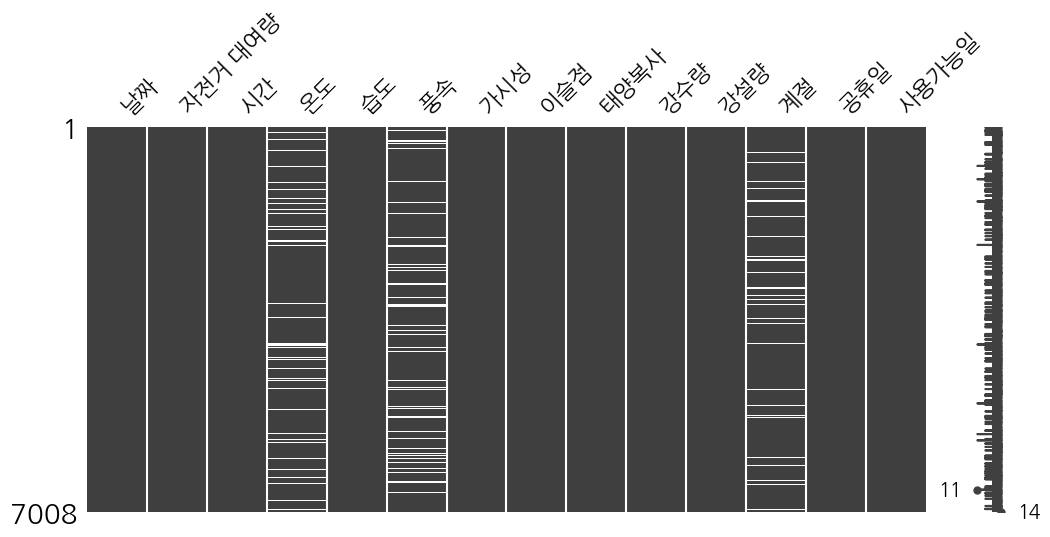

In [152]:
msno.matrix(df, figsize=(12,5))

### 중복항 확인하기

In [153]:
df.duplicated().sum()

0

### 변수의 전체값이 nan인 변수 삭제하기

In [154]:
df.dropna(axis=1,how='all')

,날짜,자전거 대여량,시간,온도,습도,풍속,가시성,이슬점,태양복사,강수량,강설량,계절,공휴일,사용가능일
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,NaN,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36,NaN,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7003,2018-11-30,1047,17,6.0,29,2.1,1877,-10.7,0.23,0.0,0.0,Autumn,No Holiday,Yes
7004,2018-11-30,1384,18,4.7,34,1.9,1661,-9.8,0.00,0.0,0.0,Autumn,No Holiday,Yes
7005,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.00,0.0,0.0,NaN,No Holiday,Yes
7006,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.00,0.0,0.0,Autumn,No Holiday,Yes


# 결측값이 있는 변수들 처리하기

## 계절

계절의 결측치를 해결하기 위해서 해당 데이터에서 각 월별로 어떤 계절에 포함되어 있는 지 확인한다.

In [155]:
for i in range(1,13):
    print(df.loc[df['날짜'].dt.month==i]['계절'])

594     Winter
595     Winter
596     Winter
597     Winter
598     Winter
         ...  
1205    Winter
1206    Winter
1207    Winter
1208    Winter
1209    Winter
Name: 계절, Length: 616, dtype: object
1210    Winter
1211    Winter
1212    Winter
1213    Winter
1214    Winter
         ...  
1745    Winter
1746    Winter
1747    Winter
1748    Winter
1749    Winter
Name: 계절, Length: 540, dtype: object
1750    Spring
1751    Spring
1752    Spring
1753    Spring
1754    Spring
         ...  
2315    Spring
2316       NaN
2317    Spring
2318    Spring
2319    Spring
Name: 계절, Length: 570, dtype: object
2320    Spring
2321    Spring
2322    Spring
2323    Spring
2324    Spring
         ...  
2885    Spring
2886    Spring
2887    Spring
2888    Spring
2889    Spring
Name: 계절, Length: 570, dtype: object
2890    Spring
2891    Spring
2892       NaN
2893    Spring
2894    Spring
         ...  
3472    Spring
3473       NaN
3474    Spring
3475    Spring
3476    Spring
Name: 계절, Length: 587, dtyp

12,1,2 : 겨울  
3,4,5 : 봄  
6,7,8: 여름  
9,10,11 : 가을  

In [156]:
df.loc[df['날짜'].dt.month.isin([12,1,2]),'계절'] = 'Winter'
df.loc[df['날짜'].dt.month.isin([3,4,5]),'계절'] = 'Spring'
df.loc[df['날짜'].dt.month.isin([6,7,8]),'계절'] = 'Summer'
df.loc[df['날짜'].dt.month.isin([9,10,11]),'계절'] = 'Autumn'
df['계절'].isna().sum()

0

In [157]:
df.head()

,날짜,자전거 대여량,시간,온도,습도,풍속,가시성,이슬점,태양복사,강수량,강설량,계절,공휴일,사용가능일
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36,NaN,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


## 온도

결측치가 있는 행을 삭제하기

In [158]:
df.dropna(subset='온도')
print(df.dropna(subset='온도').isna().sum())

날짜           0
자전거 대여량      0
시간           0
온도           0
습도           0
풍속         632
가시성          0
이슬점          0
태양복사         0
강수량          0
강설량          0
계절           0
공휴일          0
사용가능일        0
dtype: int64


온도와 상관계수가 높은 변수로 추정해서 대입하기

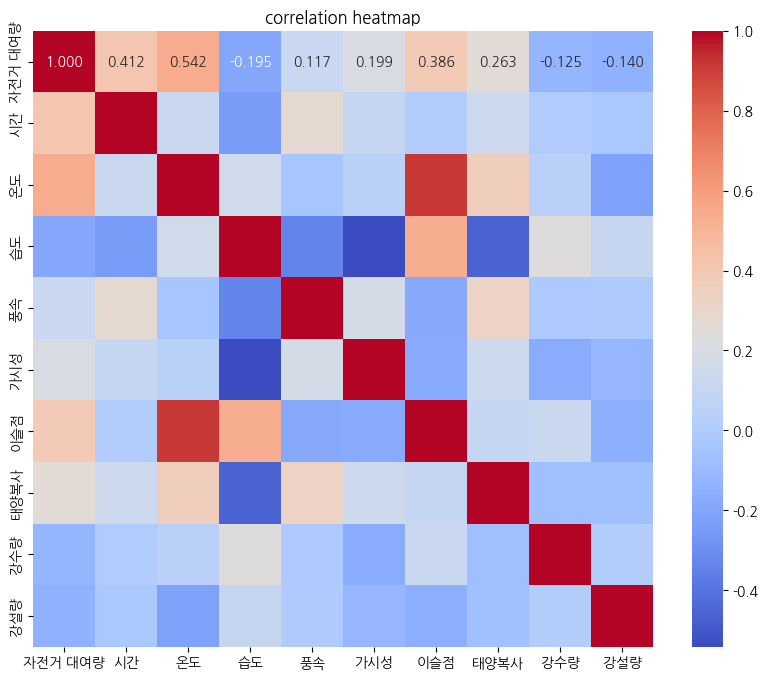

In [159]:
df_numeric = df.select_dtypes(['int64','float64'])
df_corr = df_numeric.corr()
plt.figure(figsize=(10,8))
sns.heatmap(df_corr,annot=True,cmap='coolwarm',fmt='.3f')
plt.title('correlation heatmap')
plt.show()

해당 히트맵은 numeric 변수들만 포함한 것을 볼 수 있다. 히트맵을 보고서는 이슬점과 상관관계가 높다는 것을 알 수 있다. 배경지식이나 앞서 진행한 EDA로는 온도와 계절, 온도와 날짜는 높은 관련성을 가지고 있다는 것을 알 수 있다. 이슬점은 온도와 습도로 도출할 수 있는 공식이 있는데 이 공식을 통해서 온도의 결측치를 채울 수 있다. 하지만 복잡한 계산을 수반하기 때문에 비교적 효율적인 방법을 선택하기로 했다.

### 계절로 결측치 처리하기

In [160]:
df['계절']=df['계절'].astype('category')
df.head()

,날짜,자전거 대여량,시간,온도,습도,풍속,가시성,이슬점,태양복사,강수량,강설량,계절,공휴일,사용가능일
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36,NaN,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [161]:
df.온도 = df.groupby('계절')['온도'].transform(lambda x : x.fillna(x.mean()))
df.온도.isna().sum()

0

### 선형보간법  
날짜를 기반으로 채울 수 있는 하나의 방법은 선형보간법이다. 선형보간법이란 결측치가 존재하는 변수의 행의 앞뒤 행의 해당 변수값을 직선으로 연결한 다음 그 직선의 중간값으로 채우는 방법이다. 현재 데이터를 날짜순서대로 나열했기 때문에 하루간격으로 극단적인 온도차가 나지 않을 것이라고 생각이 들어서 온도의 결측치를 날짜를 기반으로 한 선형보간법으로 채워보기로 하였다.

In [162]:
df.온도.interpolate(method = 'linear')

0      -5.2
1      -5.5
2      -6.0
3      -6.2
4      -6.0
       ... 
7003    6.0
7004    4.7
7005    4.2
7006    2.6
7007    2.1
Name: 온도, Length: 7008, dtype: float64

## 풍속

풍속을 결정짓는 요소들은 기압의 차이, 기온 차이, 해양과 육지의 상호작용, 지형 등이 있는데 해당 정보를 얻을 수 있는 변수가 존재하지 않는다. 그리고 전에 EDA에서 확인할 수 있었던 정보대로라면 계절별로 뚜렷한 차이를 찾기도 힘들었다. 그래서 풍속은 앞뒤 시간을 기반으로 결측치를 채우는 것이 제일 적절하다고 생각하였고 때문에 선형보간법으로 채우기로 하였다.

In [163]:
df.풍속 = df.풍속.interpolate(method = 'linear')
df.isna().sum()

날짜         0
자전거 대여량    0
시간         0
온도         0
습도         0
풍속         0
가시성        0
이슬점        0
태양복사       0
강수량        0
강설량        0
계절         0
공휴일        0
사용가능일      0
dtype: int64

# 이상치 확인하기

In [164]:
print(df.태양복사.value_counts())
print(df.강수량.value_counts())
print(df.강설량.value_counts())

태양복사
0.00    3430
0.01     103
0.02      63
0.03      53
0.06      50
        ... 
3.35       1
2.43       1
3.32       1
2.97       1
2.76       1
Name: count, Length: 343, dtype: int64
강수량
0.0     6588
0.5       94
1.0       50
1.5       45
0.1       34
2.0       27
2.5       19
0.2       16
3.5       15
4.0       12
0.4       12
3.0       11
6.0        6
0.3        6
5.5        5
5.0        5
9.5        5
4.5        5
6.5        4
8.0        3
0.8        3
7.0        3
1.6        2
18.5       2
13.0       2
6.4        2
18.0       2
13.5       2
14.5       1
4.9        1
21.5       1
12.0       1
1.3        1
7.5        1
16.0       1
8.5        1
1.2        1
7.3        1
29.5       1
9.1        1
0.9        1
10.5       1
5.4        1
12.5       1
10.0       1
19.0       1
35.0       1
1.9        1
17.0       1
9.0        1
3.7        1
1.4        1
3.3        1
1.1        1
0.7        1
1.8        1
Name: count, dtype: int64
강설량
0.0    6652
0.3      34
1.0      31
0.9      28
0.7

태양복사,강수량,강설량에는 0값의 빈도가 눈에 띄게 많다. 혹시 결측치이지는 않은 지 확인해보는 과정을 거친다. 우선 이렇게 많은 0의 값을 가질 수 있는 지 도메인 지식을 얻는다.

날짜
1       7.4
2      27.6
3      39.1
4     119.2
5     199.4
6     146.4
7     122.8
8     139.2
9      63.1
10     72.7
11     51.1
12     29.9
Name: 강수량, dtype: float64


Text(0.5, 1.0, '월별 강수량')

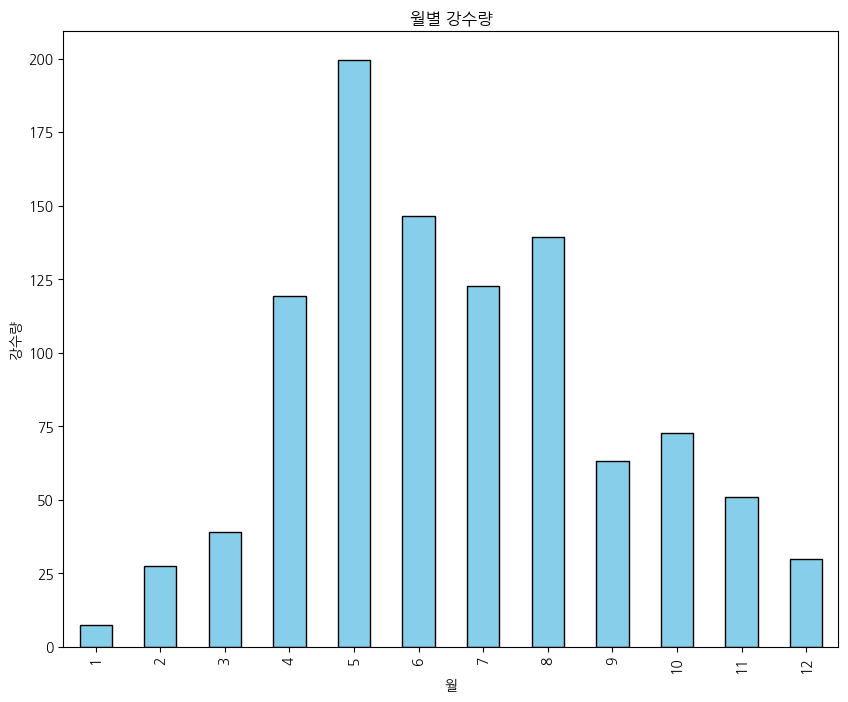

In [208]:
gr_rain = df.groupby(df['날짜'].dt.month)['강수량'].sum()
print(gr_rain)
plt.figure(figsize = (10,8))
gr_rain.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('월')
plt.ylabel('강수량')
plt.title('월별 강수량')

월별 강수량 그래프를 그려보니 우리나라 월별 강수량 그래프와 달별로 똑같은 형태를 띄는 것은 아니지만 실제 기상청 데이터의 최솟값의 나의 데이터로 그린 월 강수량 최솟값의 차이가 크지 않은 것을 알 수 있다. 즉 강수량의 0의 빈도가 많은 것이 문제가 있는 것이 아니라고 판단하였다.



![Sample Image](https://search.pstatic.net/common/?src=http%3A%2F%2Fimgnews.naver.net%2Fimage%2F001%2F2018%2F06%2F19%2FGYH2018061900030004400_P2_20180619101704240.jpg&type=sc960_832)


날짜
1     159.3
2      54.3
3       0.0
4       0.0
5       0.0
6       0.0
7       0.0
8       0.0
9       0.0
10      0.0
11    100.5
12    213.6
Name: 강설량, dtype: float64


Text(0.5, 1.0, '월별 강설량')

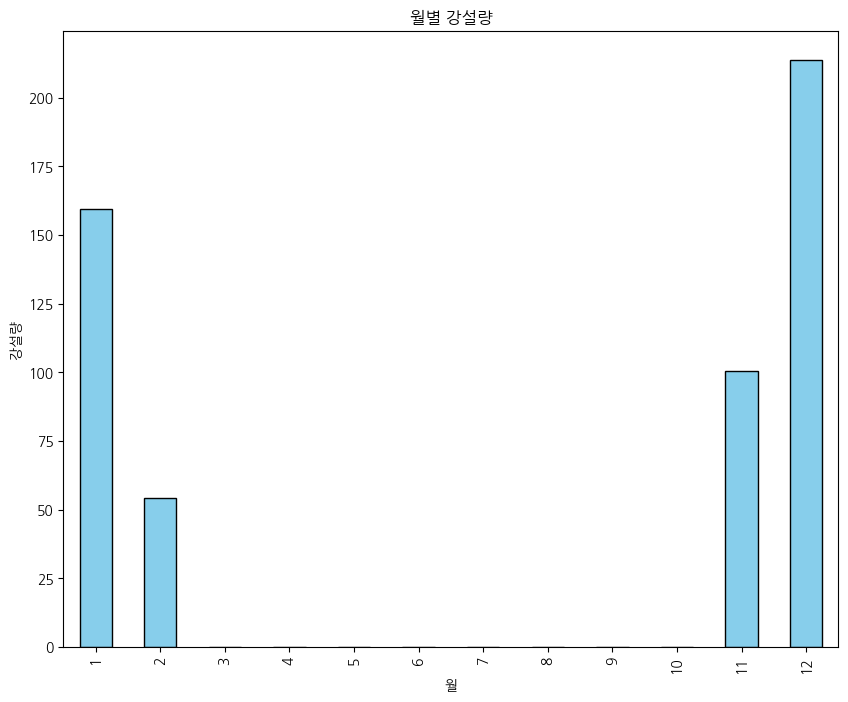

In [166]:
gr_snow = df.groupby(df['날짜'].dt.month)['강설량'].sum()
print(gr_snow)
plt.figure(figsize = (10,8))
gr_snow.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('월')
plt.ylabel('강설량')
plt.title('월별 강설량')

그래프를 보면 1월,2월,11월,12월에만 몰려있는 것을 볼 수 있다. 실제로 비와 다르게 눈은 겨울에 해당하는 달에만 내리기 때문에 0이 많아도 문제가 있는 것이 아니라는 것을 알 수 있다.

시간
0       0.00
1       0.00
2       0.00
3       0.00
4       0.00
5       0.00
6       1.99
7      24.98
8     103.22
9     212.86
10    352.64
11    470.39
12    538.66
13    558.56
14    550.55
15    458.23
16    367.06
17    230.63
18    112.66
19     40.01
20      4.19
21      0.00
22      0.00
23      0.00
Name: 태양복사, dtype: float64


Text(0.5, 1.0, '시간별 태양복사')

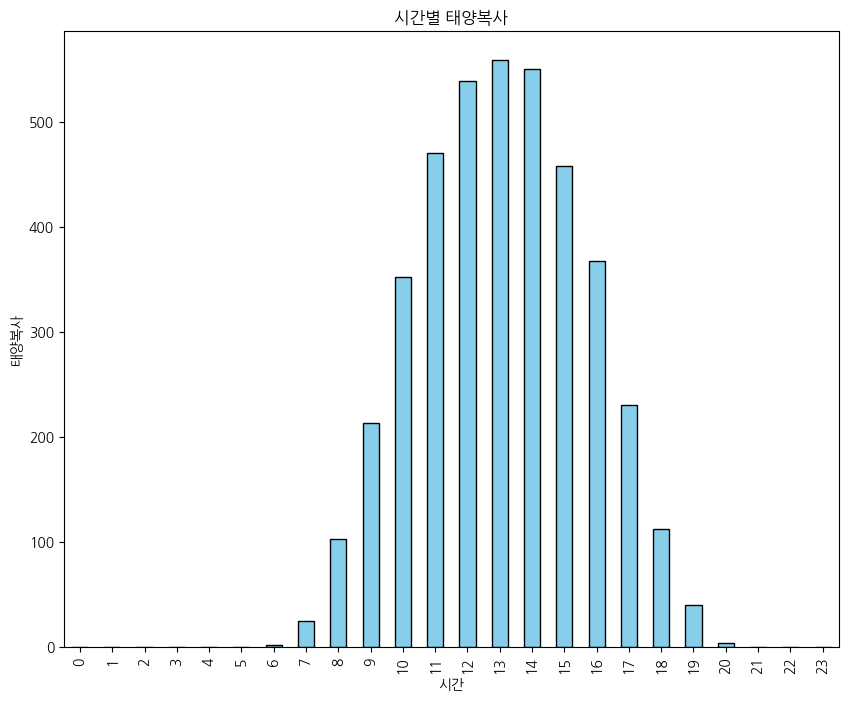

In [167]:
gr_sun = df.groupby(df['시간'])['태양복사'].sum()
print(gr_sun)
plt.figure(figsize = (10,8))
gr_sun.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('시간')
plt.ylabel('태양복사')
plt.title('시간별 태양복사')

태양복사는 해가 떠 있을 때에만 측정이 가능한 것이기 때문에 해가 떠있지 않은 시간에는 태양복사가 0의 값을 갖는다. 따라서 태양복사 변수의 0의 값이 많은 빈도를 갖는 것에 문제가 없다고 판단할 수 있따.

# 변수 다루기

In [168]:
df

,날짜,자전거 대여량,시간,온도,습도,풍속,가시성,이슬점,태양복사,강수량,강설량,계절,공휴일,사용가능일
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36,1.2,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7003,2018-11-30,1047,17,6.0,29,2.1,1877,-10.7,0.23,0.0,0.0,Autumn,No Holiday,Yes
7004,2018-11-30,1384,18,4.7,34,1.9,1661,-9.8,0.00,0.0,0.0,Autumn,No Holiday,Yes
7005,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.00,0.0,0.0,Autumn,No Holiday,Yes
7006,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.00,0.0,0.0,Autumn,No Holiday,Yes


### 변수 변환하기

연속형 데이터로 다루는 것이 아니라 그룹화하였을 때 의미있는 결과를 얻을 수 있는 변수들을 범주형변수로 타입변환 해주겠다.

In [169]:
print(df.시간.value_counts())
df.시간.astype('category')

시간
14    310
23    307
16    298
8     297
11    297
19    296
1     296
4     295
12    293
5     293
13    293
22    292
18    292
21    291
10    291
20    288
17    288
15    287
6     286
2     286
0     286
9     284
3     283
7     279
Name: count, dtype: int64


0        0
1        1
2        2
3        3
4        4
        ..
7003    17
7004    18
7005    19
7006    21
7007    22
Name: 시간, Length: 7008, dtype: category
Categories (24, int64): [0, 1, 2, 3, ..., 20, 21, 22, 23]

각 시간별 빈도가 유사한 것을 알 수 있다. 따라서 시간별로 자전거 대여량을 sum해서 플랏을 그려나가도 괜찮을 것이라는 판단을 했다.

In [170]:
df.공휴일.value_counts()
df.공휴일.astype('category')

0       No Holiday
1       No Holiday
2       No Holiday
3       No Holiday
4       No Holiday
           ...    
7003    No Holiday
7004    No Holiday
7005    No Holiday
7006    No Holiday
7007    No Holiday
Name: 공휴일, Length: 7008, dtype: category
Categories (2, object): ['Holiday', 'No Holiday']

In [171]:
print(df.사용가능일.value_counts())
df.사용가능일.astype('category')

사용가능일
Yes    6772
No      236
Name: count, dtype: int64


0       Yes
1       Yes
2       Yes
3       Yes
4       Yes
       ... 
7003    Yes
7004    Yes
7005    Yes
7006    Yes
7007    Yes
Name: 사용가능일, Length: 7008, dtype: category
Categories (2, object): ['No', 'Yes']

<Axes: xlabel='시간', ylabel='자전거 대여량'>

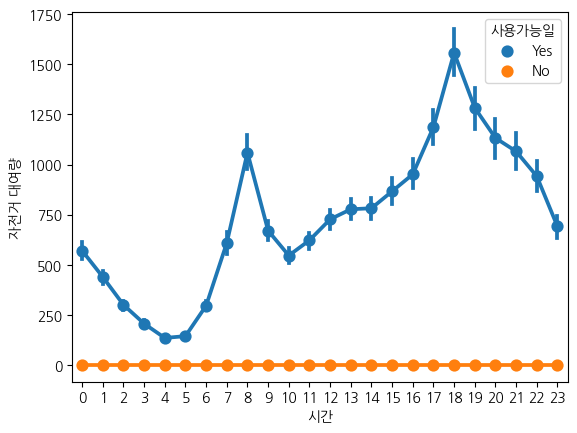

In [172]:
sns.pointplot(data=df, x='시간', y='자전거 대여량', hue='사용가능일')

사용가능일이 No인 날은 확실히 아예 사용이 불가능한 날이라고 볼 수 있다. 따라서 나는 사용가능일이 No인 날의 행을 제거하려고 한다. 내가 알고자하는 것은 변수변화에 따른 자전거 대여량의 변화인데 사용가능일이 No인 날은 집계되지 않기 때문에 분석에 도움이 되지 않을 수 있다. 유의미한 값을 놓치게 될 수 있다고 생각하기 때문이다.

### 행 제거

In [173]:
df = df.loc[df['사용가능일']=='Yes']

In [194]:
df

,날짜,자전거 대여량,시간,온도,습도,풍속,가시성,이슬점,태양복사,강수량,강설량,계절,공휴일,사용가능일,월
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes,1
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes,1
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes,1
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes,1
4,2017-12-01,78,4,-6.0,36,1.2,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7003,2018-11-30,1047,17,6.0,29,2.1,1877,-10.7,0.23,0.0,0.0,Autumn,No Holiday,Yes,30
7004,2018-11-30,1384,18,4.7,34,1.9,1661,-9.8,0.00,0.0,0.0,Autumn,No Holiday,Yes,30
7005,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.00,0.0,0.0,Autumn,No Holiday,Yes,30
7006,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.00,0.0,0.0,Autumn,No Holiday,Yes,30


In [199]:
df=df.reset_index()
df

,level_0,index,날짜,자전거 대여량,시간,온도,습도,풍속,가시성,이슬점,태양복사,강수량,강설량,계절,공휴일,사용가능일,월
0,0,0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes,1
1,1,1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes,1
2,2,2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes,1
3,3,3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes,1
4,4,4,2017-12-01,78,4,-6.0,36,1.2,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6767,6767,7003,2018-11-30,1047,17,6.0,29,2.1,1877,-10.7,0.23,0.0,0.0,Autumn,No Holiday,Yes,30
6768,6768,7004,2018-11-30,1384,18,4.7,34,1.9,1661,-9.8,0.00,0.0,0.0,Autumn,No Holiday,Yes,30
6769,6769,7005,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.00,0.0,0.0,Autumn,No Holiday,Yes,30
6770,6770,7006,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.00,0.0,0.0,Autumn,No Holiday,Yes,30


In [201]:
df = df.drop(['level_0','index'],axis=1)

In [202]:
df

,날짜,자전거 대여량,시간,온도,습도,풍속,가시성,이슬점,태양복사,강수량,강설량,계절,공휴일,사용가능일,월
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes,1
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes,1
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes,1
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes,1
4,2017-12-01,78,4,-6.0,36,1.2,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6767,2018-11-30,1047,17,6.0,29,2.1,1877,-10.7,0.23,0.0,0.0,Autumn,No Holiday,Yes,30
6768,2018-11-30,1384,18,4.7,34,1.9,1661,-9.8,0.00,0.0,0.0,Autumn,No Holiday,Yes,30
6769,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.00,0.0,0.0,Autumn,No Holiday,Yes,30
6770,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.00,0.0,0.0,Autumn,No Holiday,Yes,30


### 변수 간 관계 확인하고 새로운 변수를 만들 필요가 있는 지 검토하기

In [ ]:
sns.pointplot(data=df,x='온도',y='이슬점')

온도가 높아질수록 이슬점도 함께 높아지는 그래프 개형을 확인할 수 있다.

In [ ]:
sns.pointplot(data=df,x='습도',y='이슬점')

습도가 높아질 수록 이슬점도 높아지는 것을 확인할 수 있다. 하지만 습도가 0이 부분에서 갑자기 튀어오르는 모양이 보인다. 습도는 자연상태에서는 0이 되는 것이 거의 불가능하다. 즉, 습도가 0이라는 것은 이상치라는 것을 알 수 있다. 습도가 0인 행을 찾는다. 

In [176]:
df.loc[df['습도']==0]

,날짜,자전거 대여량,시간,온도,습도,풍속,가시성,이슬점,태양복사,강수량,강설량,계절,공휴일,사용가능일
3273,2018-05-21,165,3,13.000000,0,0.800000,2000,-2.5,0.00,0.0,0.0,Spring,No Holiday,Yes
3274,2018-05-21,113,4,12.400000,0,0.800000,2000,-3.4,0.00,0.0,0.0,Spring,No Holiday,Yes
3275,2018-05-21,200,5,11.900000,0,1.300000,2000,-2.7,0.00,0.0,0.0,Spring,No Holiday,Yes
3276,2018-05-21,467,6,11.400000,0,0.900000,2000,-2.0,0.03,0.0,0.0,Spring,No Holiday,Yes
3289,2018-05-22,406,3,13.247291,0,0.700000,1420,10.4,0.00,0.0,0.0,Spring,Holiday,Yes
3290,2018-05-22,248,4,15.600000,0,0.500000,1502,10.5,0.00,0.0,0.0,Spring,Holiday,Yes
3291,2018-05-22,182,5,15.700000,0,0.600000,1610,10.6,0.00,0.0,0.0,Spring,Holiday,Yes
3292,2018-05-22,277,6,15.500000,0,0.500000,1691,10.4,0.06,0.0,0.0,Spring,Holiday,Yes
3385,2018-05-27,174,5,17.600000,0,0.800000,1304,9.7,0.00,0.0,0.0,Spring,No Holiday,Yes
3387,2018-05-27,341,7,17.600000,0,1.433333,1219,8.7,0.34,0.0,0.0,Spring,No Holiday,Yes


습도가 0인 행들의 해당 날짜의 0을 제외한 평균 습도를 구한 후 습도를 0에서 해당 값으로 변경하고자 한다.

In [177]:
df.loc[(df['날짜'] == '2018-05-21') & (df['습도'] == 0),'습도']= round(df[df['날짜']=='2018-05-21'].loc[df['습도']!=0,'습도'].mean(),0)
df.loc[(df['날짜'] == '2018-05-22') & (df['습도'] == 0),'습도']= round(df[df['날짜']=='2018-05-22'].loc[df['습도']!=0,'습도'].mean(),0)
df.loc[(df['날짜'] == '2018-05-27') & (df['습도'] == 0),'습도']= round(df[df['날짜']=='2018-05-27'].loc[df['습도']!=0,'습도'].mean(),0)
df.loc[(df['날짜'] == '2018-05-28') & (df['습도'] == 0),'습도']= round(df[df['날짜']=='2018-05-28'].loc[df['습도']!=0,'습도'].mean(),0)


In [178]:
print(df[(df['날짜'] == '2018-05-21')])
print(df[(df['날짜'] == '2018-05-22')])
print(df[(df['날짜'] == '2018-05-27')])
print(df[(df['날짜'] == '2018-05-28')])

             날짜  자전거 대여량  시간         온도  습도    풍속   가시성   이슬점  태양복사  강수량  강설량  \
3271 2018-05-21      666   0  15.300000  29  1.30  2000  -2.6  0.00  0.0  0.0   
3272 2018-05-21      420   1  13.247291  31  1.10  2000  -2.4  0.00  0.0  0.0   
3273 2018-05-21      165   3  13.000000  40  0.80  2000  -2.5  0.00  0.0  0.0   
3274 2018-05-21      113   4  12.400000  40  0.80  2000  -3.4  0.00  0.0  0.0   
3275 2018-05-21      200   5  11.900000  40  1.30  2000  -2.7  0.00  0.0  0.0   
3276 2018-05-21      467   6  11.400000  40  0.90  2000  -2.0  0.03  0.0  0.0   
3277 2018-05-21     1785   8  15.300000  30  1.30  2000  -2.2  1.30  0.0  0.0   
3278 2018-05-21     1118   9  17.700000  27  1.30  2000  -1.5  2.02  0.0  0.0   
3279 2018-05-21     1129  11  20.900000  27  1.70  2000   1.1  3.11  0.0  0.0   
3280 2018-05-21     1373  12  21.800000  31  2.10  2000   3.9  3.39  0.0  0.0   
3281 2018-05-21     1456  13  22.800000  31  1.90  1923   4.7  3.49  0.0  0.0   
3282 2018-05-21     1483  14

<Axes: xlabel='습도', ylabel='이슬점'>

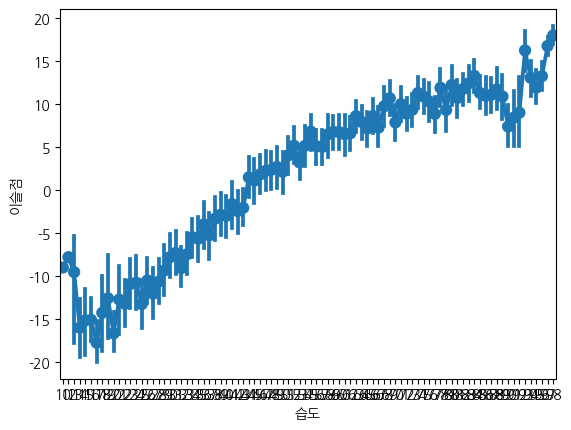

In [179]:
# 대체 후 플랏그리기
sns.pointplot(data=df,x='습도',y='이슬점')

이전보다 튀는 값이 없어진 것을 확인할 수 있다.

## EDA 수정된 데이터로 다시해보기

### 가설 1 : 겨울>여름>봄,가을 순으로 자전거 대여량이 많을 것이다.  
### 가설 2 : 출퇴근 시간에 자전거 대여량이 많을 것이다.

# 날짜  
달 별 자전거 대여수 파악하기

In [180]:
df.날짜.dt.month.value_counts()

날짜
1     616
7     608
12    594
6     584
8     579
3     570
5     566
4     550
2     540
10    537
11    526
9     502
Name: count, dtype: int64

월 별 빈도가 차이가 있긴 하지만 굉장히 크게 나지 않기 때문에 mean으로 월별 자전거 대여량을 확인하기로 한다.

### 월 별 자전거 대여량 확인하기

Text(0.5, 1.0, '월별 자전거 대여량의 평균')

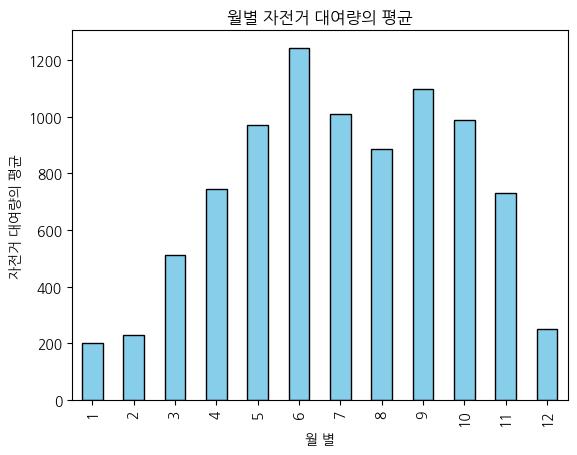

In [181]:
monthly_data = df.groupby(df['날짜'].dt.month)['자전거 대여량'].mean()
monthly_data.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('월 별')
plt.ylabel('자전거 대여량의 평균')
plt.title('월별 자전거 대여량의 평균')

In [205]:
df['월']=df.날짜.dt.month

월별 자전거 대여량을 빈도수의 영향을 받지 않도록 pointplot을 통해서 시간별 변화량과 함께 보고 싶어서 새로운 변수를 추가했다.

<Axes: xlabel='시간', ylabel='자전거 대여량'>

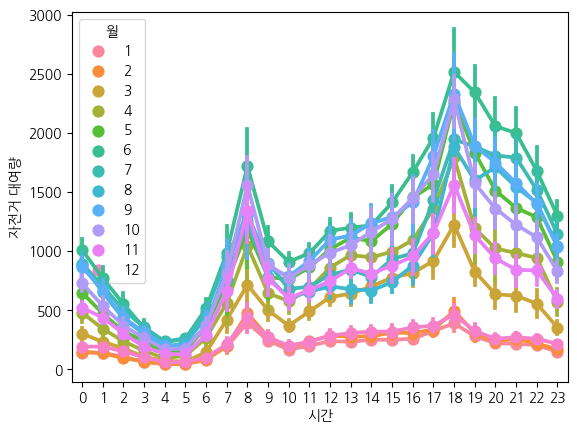

In [206]:
sns.pointplot(data=df, x='시간', y='자전거 대여량', hue='월')

히스토그램과 pointplot에서 5월에서 10월까지 높은 자전거 대여량을 확인할 수 있고 12,1,2가 눈에 띄게 낮은 것을 확인할 수 있다.

### 일 별 자전거 대여량 확인하기

In [184]:
df.날짜.dt.day.value_counts()

날짜
8     237
12    237
14    235
25    234
26    233
24    233
16    232
7     232
21    232
23    230
20    230
17    230
15    229
1     228
27    226
13    225
5     224
22    223
18    217
10    217
3     216
28    215
29    212
19    211
4     206
11    204
2     200
6     196
9     192
30    190
31    146
Name: count, dtype: int64

월별로 있다가 없다가 하는 31일을 제외하고는 많은 차이가 있지는 않다. 빈도 차이가 최대한 덜 영향을 끼치게 하도록 하기 위해서 평균으로 날짜별로 진행한다.

Text(0.5, 1.0, 'daily Total Rented Bike Count')

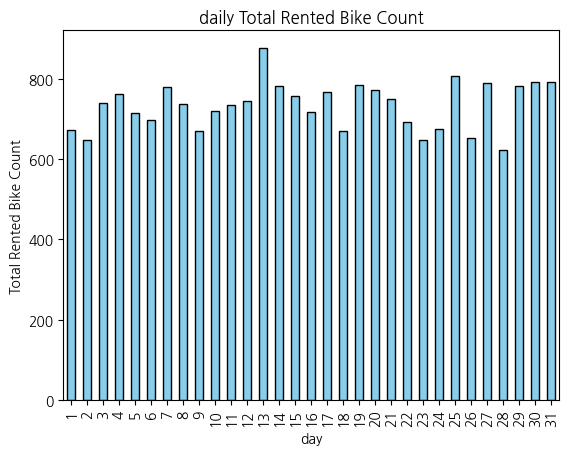

In [185]:
monthly_data = df.groupby(df['날짜'].dt.day)['자전거 대여량'].mean()
monthly_data.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('day')
plt.ylabel('Total Rented Bike Count')
plt.title('daily Total Rented Bike Count')

### 시간 별 자전거 대여량

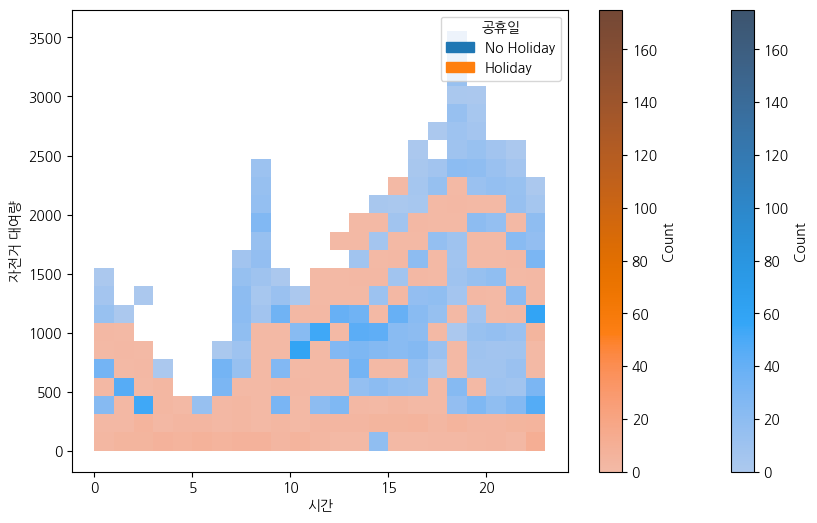

In [186]:
plt.figure(figsize=(10, 6))
hist=sns.histplot(data=df, x='시간', y='자전거 대여량',hue='공휴일', bins=23, cmap='cool') 

# 컬러바 추가
plt.colorbar(hist.collections[0], ax=hist.axes, orientation='vertical', label='Count')
plt.colorbar(hist.collections[1], ax=hist.axes, orientation='vertical', label='Count')

히스토그램을 그려보아도 공휴일이 아닌 날이 공휴일보다 자전거 대여량이 높은 쪽에 분포되어 있는 것을 볼 수 있다.

<Axes: xlabel='시간', ylabel='자전거 대여량'>

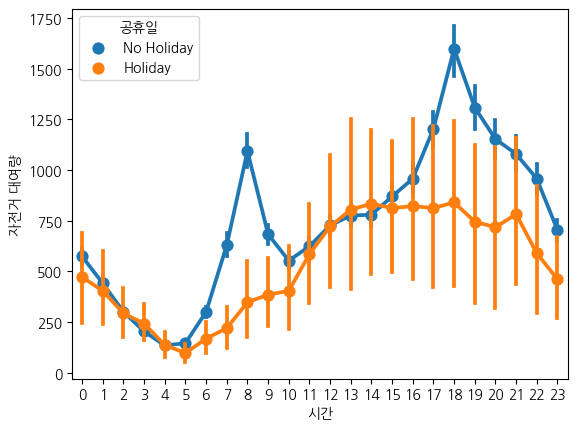

In [187]:
sns.pointplot(data=df, x='시간', y='자전거 대여량', hue='공휴일')

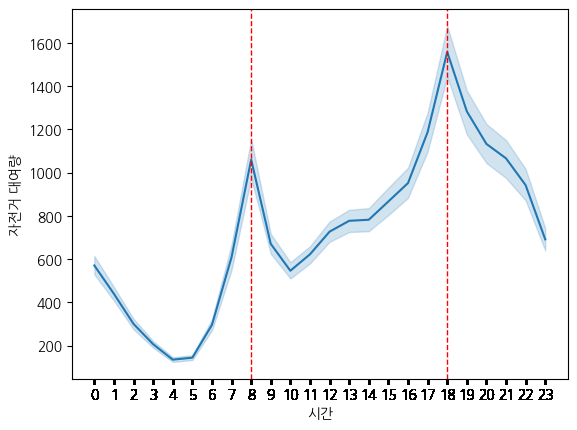

In [188]:
sns.lineplot(x='시간', y='자전거 대여량',data=df)
plt.xticks(ticks=df['시간'])# x축 값 다 보이게 하기
plt.axvline(x=8, color='red', linestyle='--', linewidth=1)
# 세로선 추가
plt.axvline(x=18, color='red', linestyle='--', linewidth=1)

8시와 18시에 가장 많은 자전거 대여량을 확인할 수 있고 동시에 공휴일인 날보다 공휴일이 아닌 날에 전반적으로 더 많은 자전거 대여량을 확인할 수 있다.

In [189]:
df.계절.value_counts()

계절
Summer    1771
Winter    1750
Spring    1686
Autumn    1565
Name: count, dtype: int64

각 계절별 빈도에 차이가 약간 있어서 고려하면서 분석하기로 한다. 최대한 빈도의 영향을 덜 받는 방법으로 분석하기로 한다.

<Axes: xlabel='시간', ylabel='자전거 대여량'>

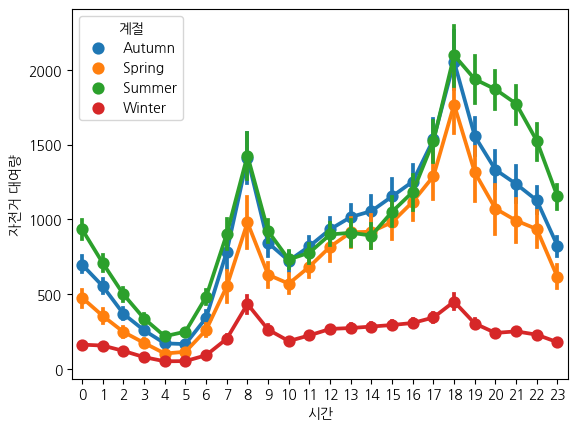

In [190]:
sns.pointplot(data=df, x='시간', y='자전거 대여량', hue='계절')

계절별로 그래프를 그린 결과 여름이 가장 높은 대여량을 보이고 있지만 봄,가을 역시 여름과 눈에 띄게 큰 차이를 보이고 있지 않다. 가을이 봄보다 조금 높은 것을 볼 수 있는데 가을은 가장 대여량이 높은 여름에서 넘어가는 계절이기에 더 높은 것으로 추정된다.

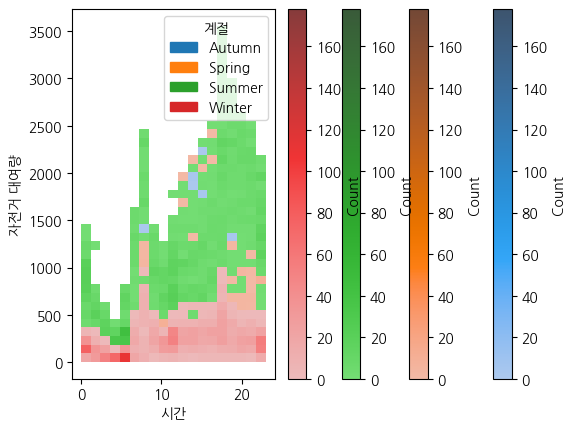

In [191]:
hist=sns.histplot(data=df, x='시간', y='자전거 대여량', hue='계절')
plt.colorbar(hist.collections[0], ax=hist.axes, orientation='vertical', label='Count')
plt.colorbar(hist.collections[1], ax=hist.axes, orientation='vertical', label='Count')
plt.colorbar(hist.collections[2], ax=hist.axes, orientation='vertical', label='Count')
plt.colorbar(hist.collections[3], ax=hist.axes, orientation='vertical', label='Count')

히스토그램을 그려보아도 컬러가 명확하게 나뉘는 것을 볼 수 있다. 

위와 같은 분석을 통해서 얻을 수 있는 정보는 여름에 가장 높은 자전거 대여량을 보여줍니다. 하지만 봄,가을과는 큰 차이 없이 유사한 정도의 높은 대여량을 보여주고 있습니다. 또한 강수량 그래프와 연관지어서 생각하면 5월에 높은 강수량을 볼 수 있습니다. 그래서 5월이 포함된 봄의 계절에 가을보다 낮은 자전거 대여량을 보이고 있나 라는 생각을 했습니다. 또한 5월의 높은 강수량으로 인해 주춤했던 자전거 대여량이 비가 그친 후에 눈에 띄게 증가한 것을 확인할 수 있습니다.  

따라서 봄,가을이 여름보다 자전거 대여량이 많을 것이라는 저의 가설은 수정이 필요합니다.  

시간대별 자전거 대여량을 확인했을 때 8시와 18시에 가장 높은 대여량을 확인할 수 있습니다. 이와 같은 지표는 계절별로 나누어 확인해도 같은 형태를 띄고 있습니다. 하지만 공휴일과 공휴일이 아닌 날의 그래프의 모양에 차이가 있습니다. 공휴일 그래프는 전반적으로 이른 오후에 높은 대여량을 띄고 있습니다. 따라서 출퇴근 시간에 자전거 대여량이 많을 것이라는 저의 가설이 이 데이터를 통해서 타당성을 가질 수 있다고 생각합니다.  

이와 같은 분석 결과로 얻을 수 있는 것은 자전거 대여량이 많은 여름에는 따릉이 월간 이용권과 같은 상품들의 수요가 높아질 것이라고 생각이 듭니다. 또한 출퇴근 시간에 자전거 대여량이 많은 것으로 보아 월간 이용권과 같은 상품을 평일권과 평일+주말권으로 판매를 하여 두 가지 경우 중에 선택할 수 있도록 하는 것이 출퇴근 시간에 따릉이를 이용하는 사람들을 타겟화할 수 있을 것이라고 생각합니다. 또한 이용객이 많은 봄,여름,가을에는 강수량이 높은 달이 많기 때문에 중간에 이용권을 정지할 수 있는 기능이 있다면 장마철에도 정기권 상품에 대한 수요를 유지할 수 있을 것이라는 생각을 하였습니다.